In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
my_color1 = 'cornflowerblue'
my_color2 = 'dodgerblue'

In [3]:
original_df = pd.read_csv("datas/bank-additional-full.csv",delimiter=";")

In [4]:
original_df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35159,27,services,single,high.school,unknown,no,no,cellular,may,fri,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
20870,31,admin.,married,university.degree,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
40272,52,admin.,married,professional.course,no,yes,yes,cellular,jul,tue,...,2,6,1,success,-1.7,94.215,-40.3,0.893,4991.6,yes
8191,39,blue-collar,married,basic.6y,no,yes,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
35931,56,admin.,divorced,university.degree,no,yes,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,yes
7226,59,admin.,married,high.school,no,yes,no,telephone,may,thu,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
10612,36,technician,single,university.degree,no,yes,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
3005,44,blue-collar,divorced,basic.6y,no,no,no,telephone,may,wed,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
40267,23,technician,single,professional.course,no,yes,no,telephone,jul,tue,...,1,999,0,nonexistent,-1.7,94.215,-40.3,0.893,4991.6,no


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
original_df.shape

(41188, 21)

### Data Preparation

In [7]:
df = original_df.rename(columns={'y':'deposit'})

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
deposit
['no' 'yes']


In [9]:
df.duplicated().sum()

12

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(41176, 21)

In [12]:
(df['education'].values == 'unknown').sum()


1730

In [13]:
# In this dataset, missing data is indicated as "unknown".
(df == 'unknown').sum()
    

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
deposit              0
dtype: int64

In [14]:
# We found "unknown" label frequency in the dataset
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    print('---------')
    print(df.groupby(by=[col]).size()/len(df))

---------
job
admin.           0.253036
blue-collar      0.224718
entrepreneur     0.035360
housemaid        0.025743
management       0.071012
retired          0.041723
self-employed    0.034510
services         0.096343
student          0.021250
technician       0.163663
unemployed       0.024626
unknown          0.008014
dtype: float64
---------
marital
divorced    0.111983
married     0.605231
single      0.280843
unknown     0.001943
dtype: float64
---------
education
basic.4y               0.101418
basic.6y               0.055639
basic.9y               0.146809
high.school            0.231008
illiterate             0.000437
professional.course    0.127259
university.degree      0.295415
unknown                0.042015
dtype: float64
---------
default
no         0.791165
unknown    0.208762
yes        0.000073
dtype: float64
---------
housing
no         0.452084
unknown    0.024043
yes        0.523873
dtype: float64
---------
loan
no         0.824218
unknown    0.024043
yes       

In [15]:
from data_collection_and_cleaning import DataCleaning

cleaning = DataCleaning(df)

# find_key_columns metotunu çağırarak sonuçları alın
unknown_result = cleaning.find_key_columns('unknown')

unknown_columns = []
for col, freq_df in unknown_result.items():
    print(f"Column: {col}")
    unknown_columns.append(col)
    print(freq_df)
    print('\n')

Column: job
              job  Frequency
0          admin.   0.253036
1     blue-collar   0.224718
2    entrepreneur   0.035360
3       housemaid   0.025743
4      management   0.071012
5         retired   0.041723
6   self-employed   0.034510
7        services   0.096343
8         student   0.021250
9      technician   0.163663
10     unemployed   0.024626
11        unknown   0.008014


Column: marital
    marital  Frequency
0  divorced   0.111983
1   married   0.605231
2    single   0.280843
3   unknown   0.001943


Column: education
             education  Frequency
0             basic.4y   0.101418
1             basic.6y   0.055639
2             basic.9y   0.146809
3          high.school   0.231008
4           illiterate   0.000437
5  professional.course   0.127259
6    university.degree   0.295415
7              unknown   0.042015


Column: default
   default  Frequency
0       no   0.791165
1  unknown   0.208762
2      yes   0.000073


Column: housing
   housing  Frequency
0     

In [16]:
cleaning.fill_missing_with_mode(unknown_columns,'unknown')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df.replace(to_replace='unknown',value=np.NaN,inplace=True)

#drop options
#df.dropna(inplace=True)

# filled with most frequently used value
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    df[col].fillna(df[col].mode()[0], inplace=True)



categorical variables:
- job : "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"
- marital : "divorced","married","single","unknown"
- education : "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"
- default : "no","yes","unknown"
- housing : "no","yes","unknown"
- loan : "no","yes","unknown"
- contact : "cellular","telephone"
- month : "jan", "feb", "mar", ..., "nov", "dec"
- day_of_week : "mon","tue","wed","thu","fri"
- poutcome :"failure","nonexistent","success"
- deposit : binary: "yes","no"
---
- pdays : 999 means client was not previously contacted
- Missing Attribute Values : all coded with the "unknown" label


- I am planning on using Classification methods:
    - KNN
    - SVM
    - Decision Tree
    - Random Forests
    - Logistic Regression
    - GradientBoostingClassifier
    - XGBClassifier
    - GaussianNB 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### EDA

In [19]:
from exploratory_data_analysis import EDA

eda = EDA(df)


In [20]:
categ_features = eda.find_categorical_unique_features(target_column='deposit')
categ_features

,Feature,Unique Categories
0,job,11
1,marital,3
2,education,7
3,default,2
4,housing,2
5,loan,2
6,contact,2
7,month,10
8,day_of_week,5
9,poutcome,3


In [21]:
eda.find_categorical_describle(categ_columns=df[categ_features['Feature']])

,count,unique,top,freq
job,41176,11,admin.,10749
marital,41176,3,married,25001
education,41176,7,university.degree,13894
default,41176,2,no,41173
housing,41176,2,yes,22561
loan,41176,2,no,34928
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


In [22]:
categ_variables = df.select_dtypes(include='object')
categ_variables.describe().T

,count,unique,top,freq
job,41176,11,admin.,10749
marital,41176,3,married,25001
education,41176,7,university.degree,13894
default,41176,2,no,41173
housing,41176,2,yes,22561
loan,41176,2,no,34928
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


In [23]:
numeric_features=eda.find_numeric_features_list(target_column='deposit')

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [24]:
eda.find_numeric_describle(numeric_columns = df[eda.find_numeric_features_list(target_column='deposit')])

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [25]:
numeric_variables = df.select_dtypes(include=['int64', 'float64'])

numeric_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


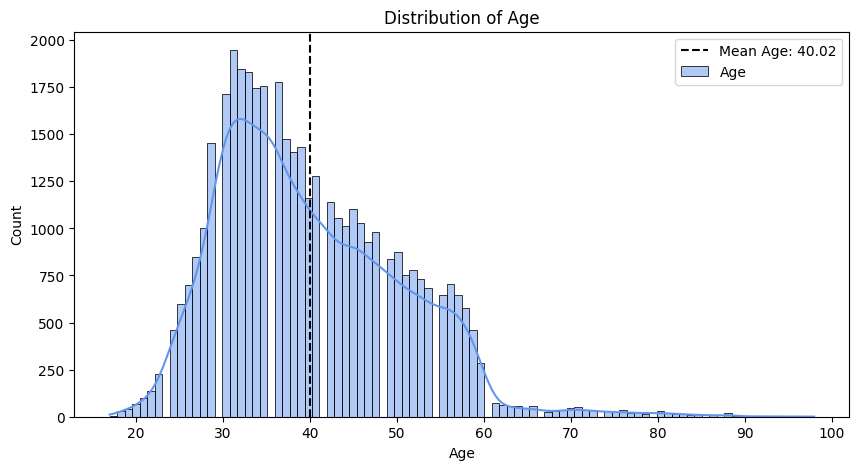

In [26]:
# Visaulizing how age is distributed in the dataset
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', kde=True, color=my_color1, edgecolor='black' , label ='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()

plt.xlabel("Age")
plt.title('Distribution of Age')
plt.show()

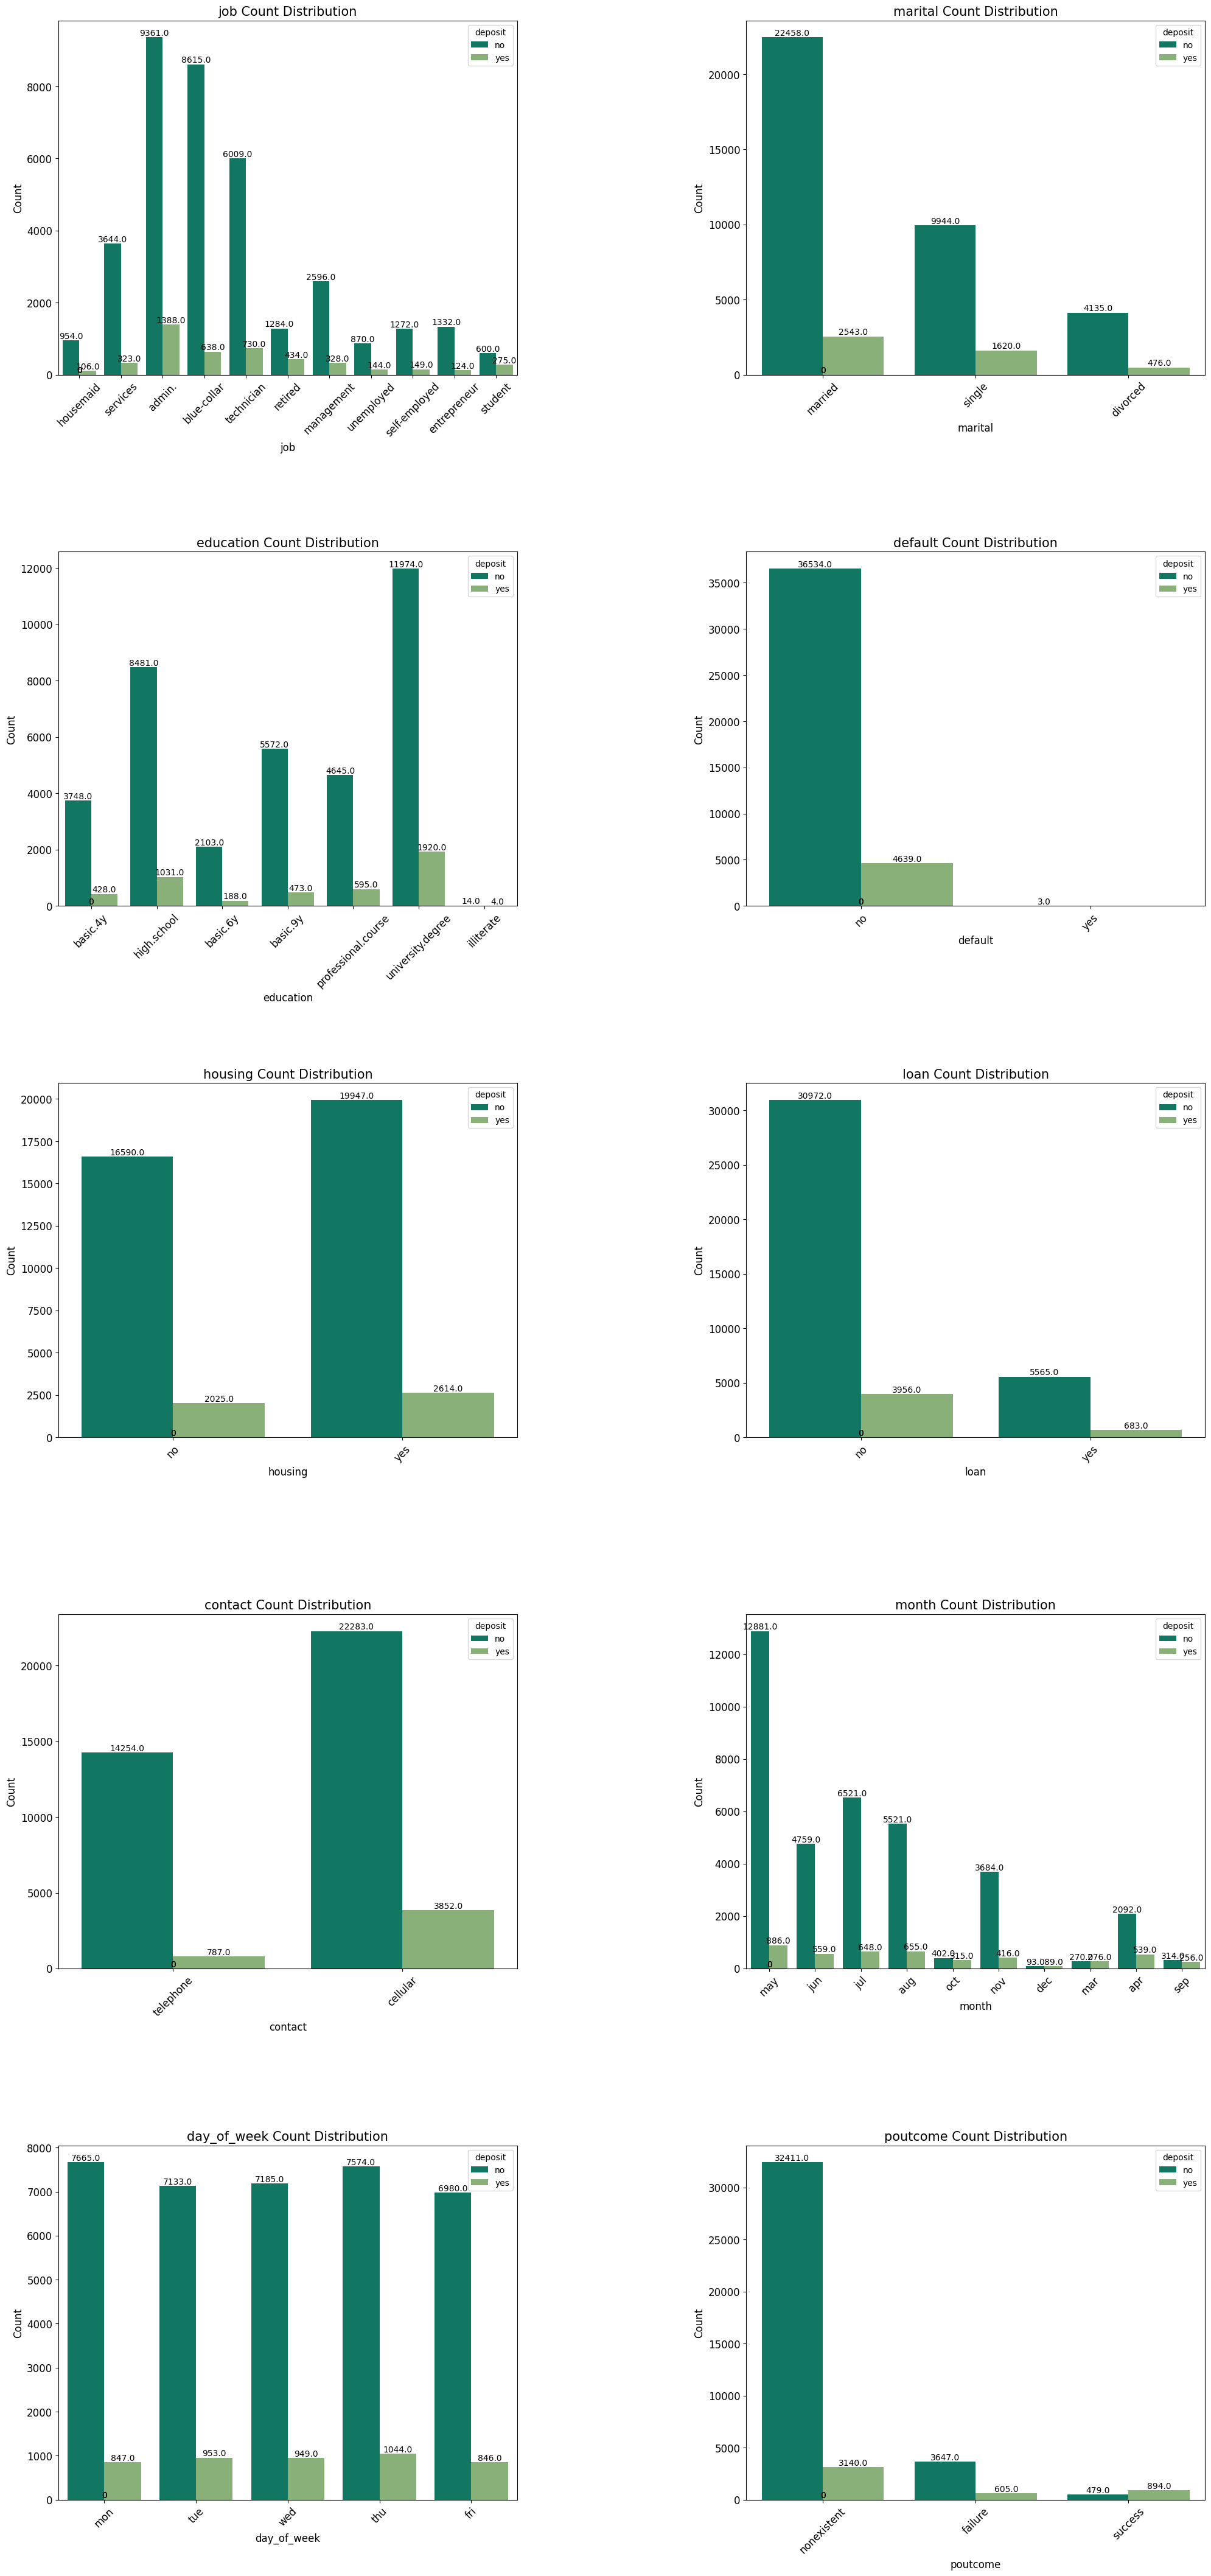

In [27]:
eda.countplot_categorical(categ_features['Feature'],hue_column = 'deposit')

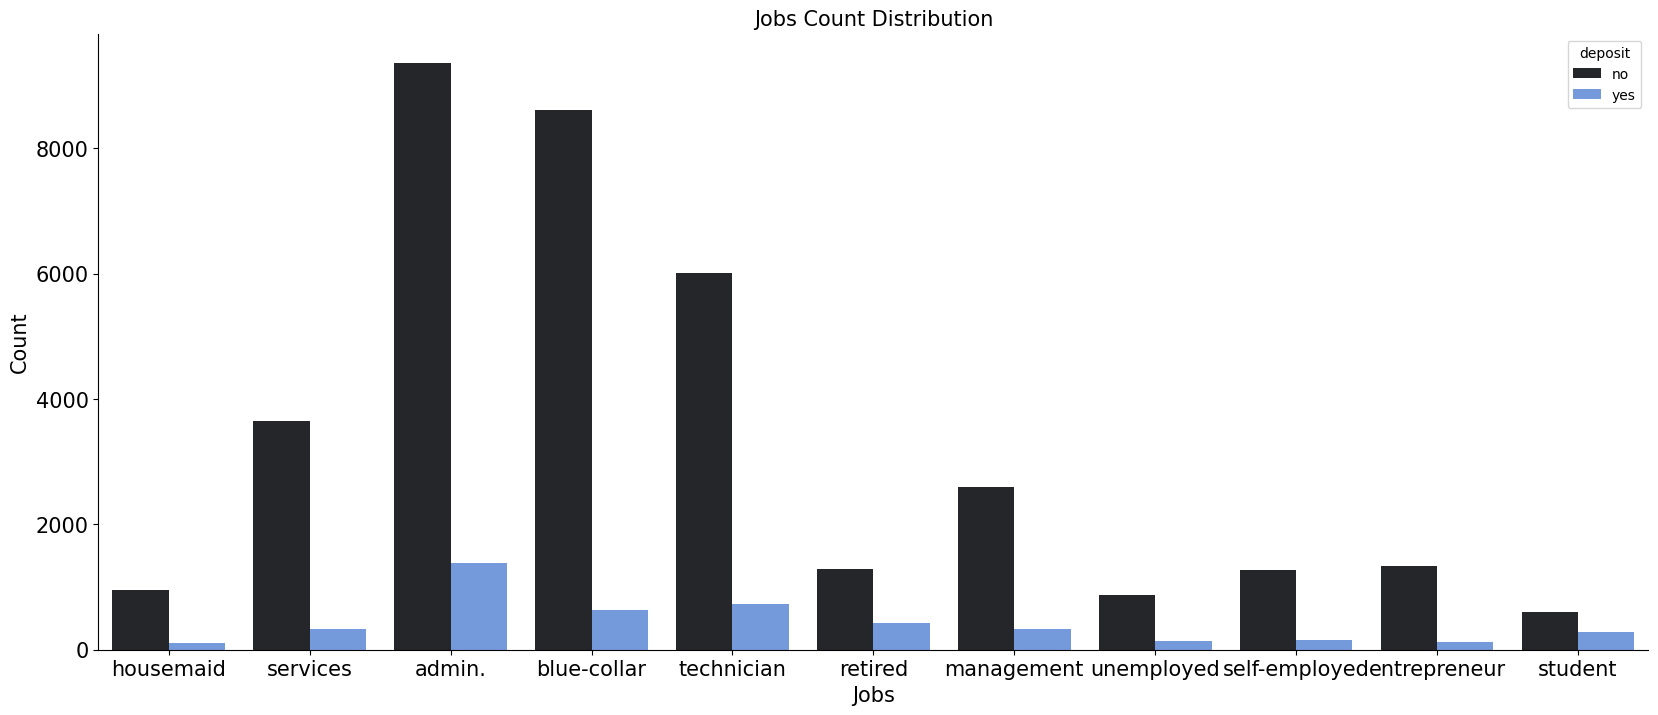

In [28]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
plt.figure(figsize=(20,8))
sns.countplot(x = 'job', data = df, hue = 'deposit',palette='dark:' + my_color1)
plt.xlabel('Jobs', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Jobs Count Distribution', fontsize=15)
plt.tick_params(labelsize=15)
sns.despine()



C:\Users\Fydil35\AppData\Local\Temp\ipykernel_11964\1751087431.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)


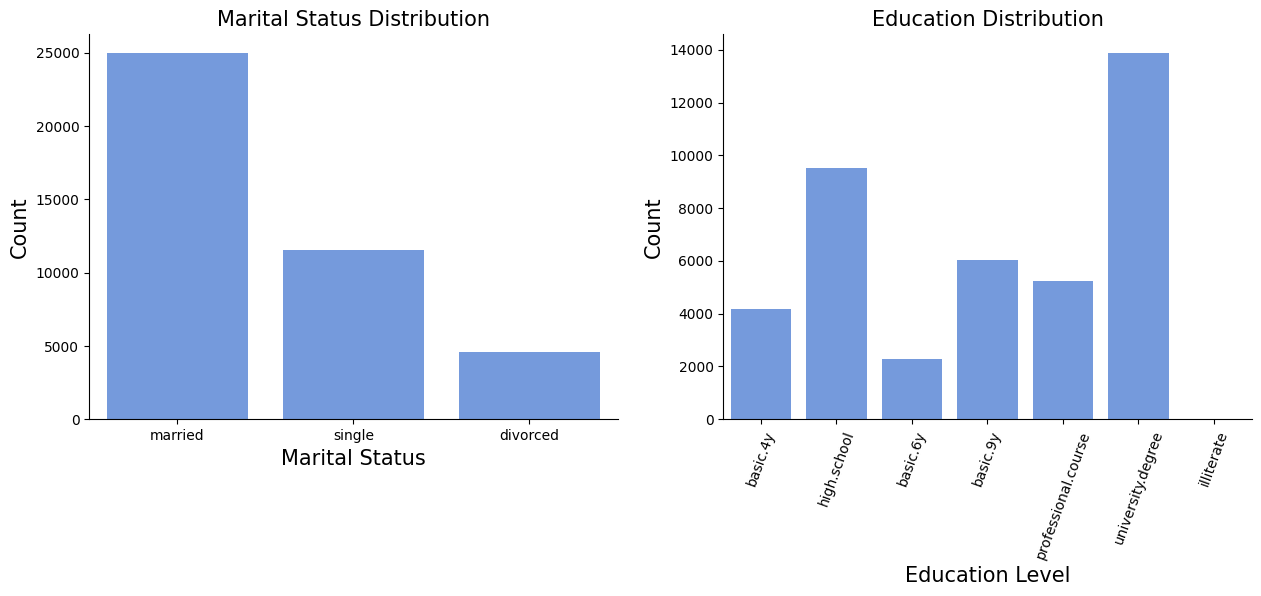

In [29]:
# Visualizing how Maritial Status and Education is distributed in the dataset. 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# First plot for marital status
sns.countplot(x = "marital", data = df, ax = ax1, color=my_color1)
ax1.set_title("Marital Status Distribution", fontsize = 15)
ax1.set_xlabel("Marital Status", fontsize = 15)
ax1.set_ylabel("Count", fontsize = 15)

# Second plot for Education distribution
sns.countplot(x = "education", data = df, ax = ax2, color=my_color1)
ax2.set_title("Education Distribution", fontsize = 15)
ax2.set_xlabel("Education Level", fontsize = 15)
ax2.set_ylabel("Count", fontsize = 15)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)
sns.despine()


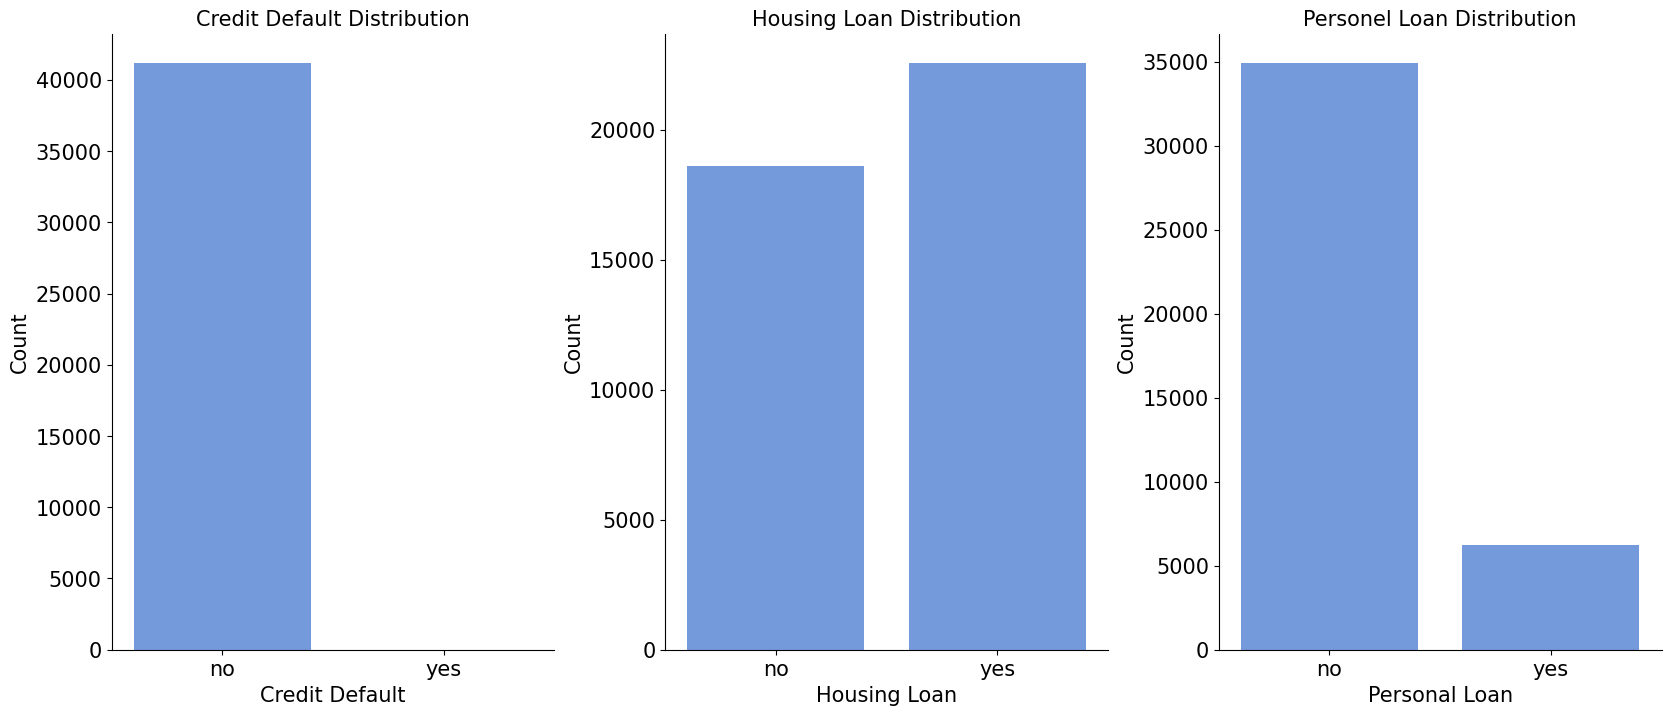

In [30]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, color=my_color1 )
ax1.set_title('Credit Default Distribution', fontsize=15)
ax1.set_xlabel('Credit Default', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df, ax = ax2, color=my_color1)
ax2.set_title('Housing Loan Distribution', fontsize=15)
ax2.set_xlabel('Housing Loan', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df, ax = ax3, color=my_color1)
ax3.set_title('Personel Loan Distribution', fontsize=15)
ax3.set_xlabel('Personal Loan', fontsize=15)
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
sns.despine()

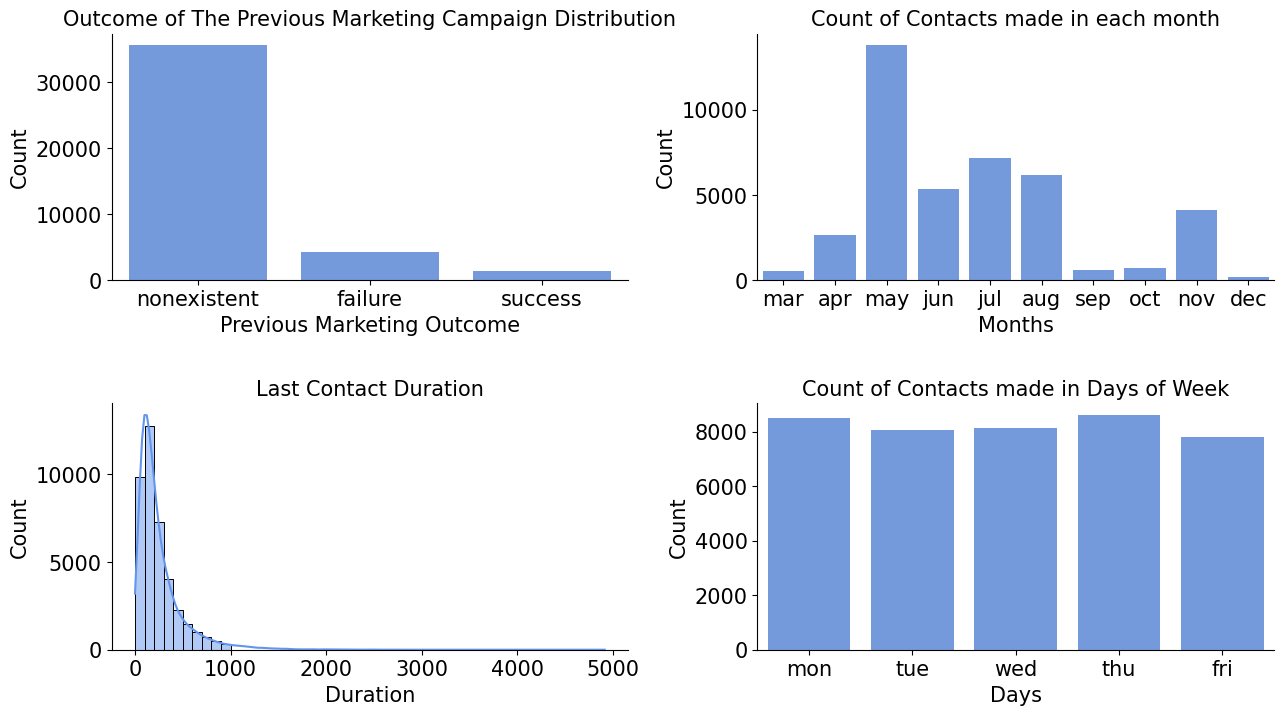

In [31]:
#outcome of the previous marketing campaign
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
sns.countplot( x= 'poutcome', data = df, color=my_color1 ,ax=ax1)
ax1.set_title("Outcome of The Previous Marketing Campaign Distribution", fontsize=15)
ax1.set_xlabel('Previous Marketing Outcome', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# For Months
sns.countplot(x = 'month', data = df, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],color=my_color1 )
ax2.set_xlabel("Months", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)
ax2.set_title("Count of Contacts made in each month", fontsize=15)
ax2.tick_params(labelsize=15)


# For duration
sns.histplot(data=df, x='duration',
             bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
             kde=True, 
             color=my_color1, 
             edgecolor='black',
             ax = ax3, 
             label ='duration')


ax3.set_xlabel("Duration", fontsize=15)
ax3.set_ylabel("Count", fontsize=15)
ax3.set_title("Last Contact Duration", fontsize=15)
ax3.tick_params(labelsize=15)

# day_of_week     
sns.countplot(x = 'day_of_week', data = df, ax = ax4, order = ['mon', 'tue', 'wed', 'thu', 'fri'],color=my_color1 )
ax4.set_xlabel("Days", fontsize=15)
ax4.set_ylabel("Count", fontsize=15)
ax4.set_title("Count of Contacts made in Days of Week", fontsize=15)
ax4.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.5)
sns.despine()
plt.show()

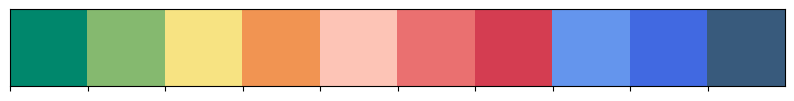

In [32]:
my_colormap= ['#00876c','#85b96f','#f7e382','#f19452','#fdc4b6','#ea7070','#d43d51','#6495ED','#4169E1','#385a7c']
sns.palplot(my_colormap)

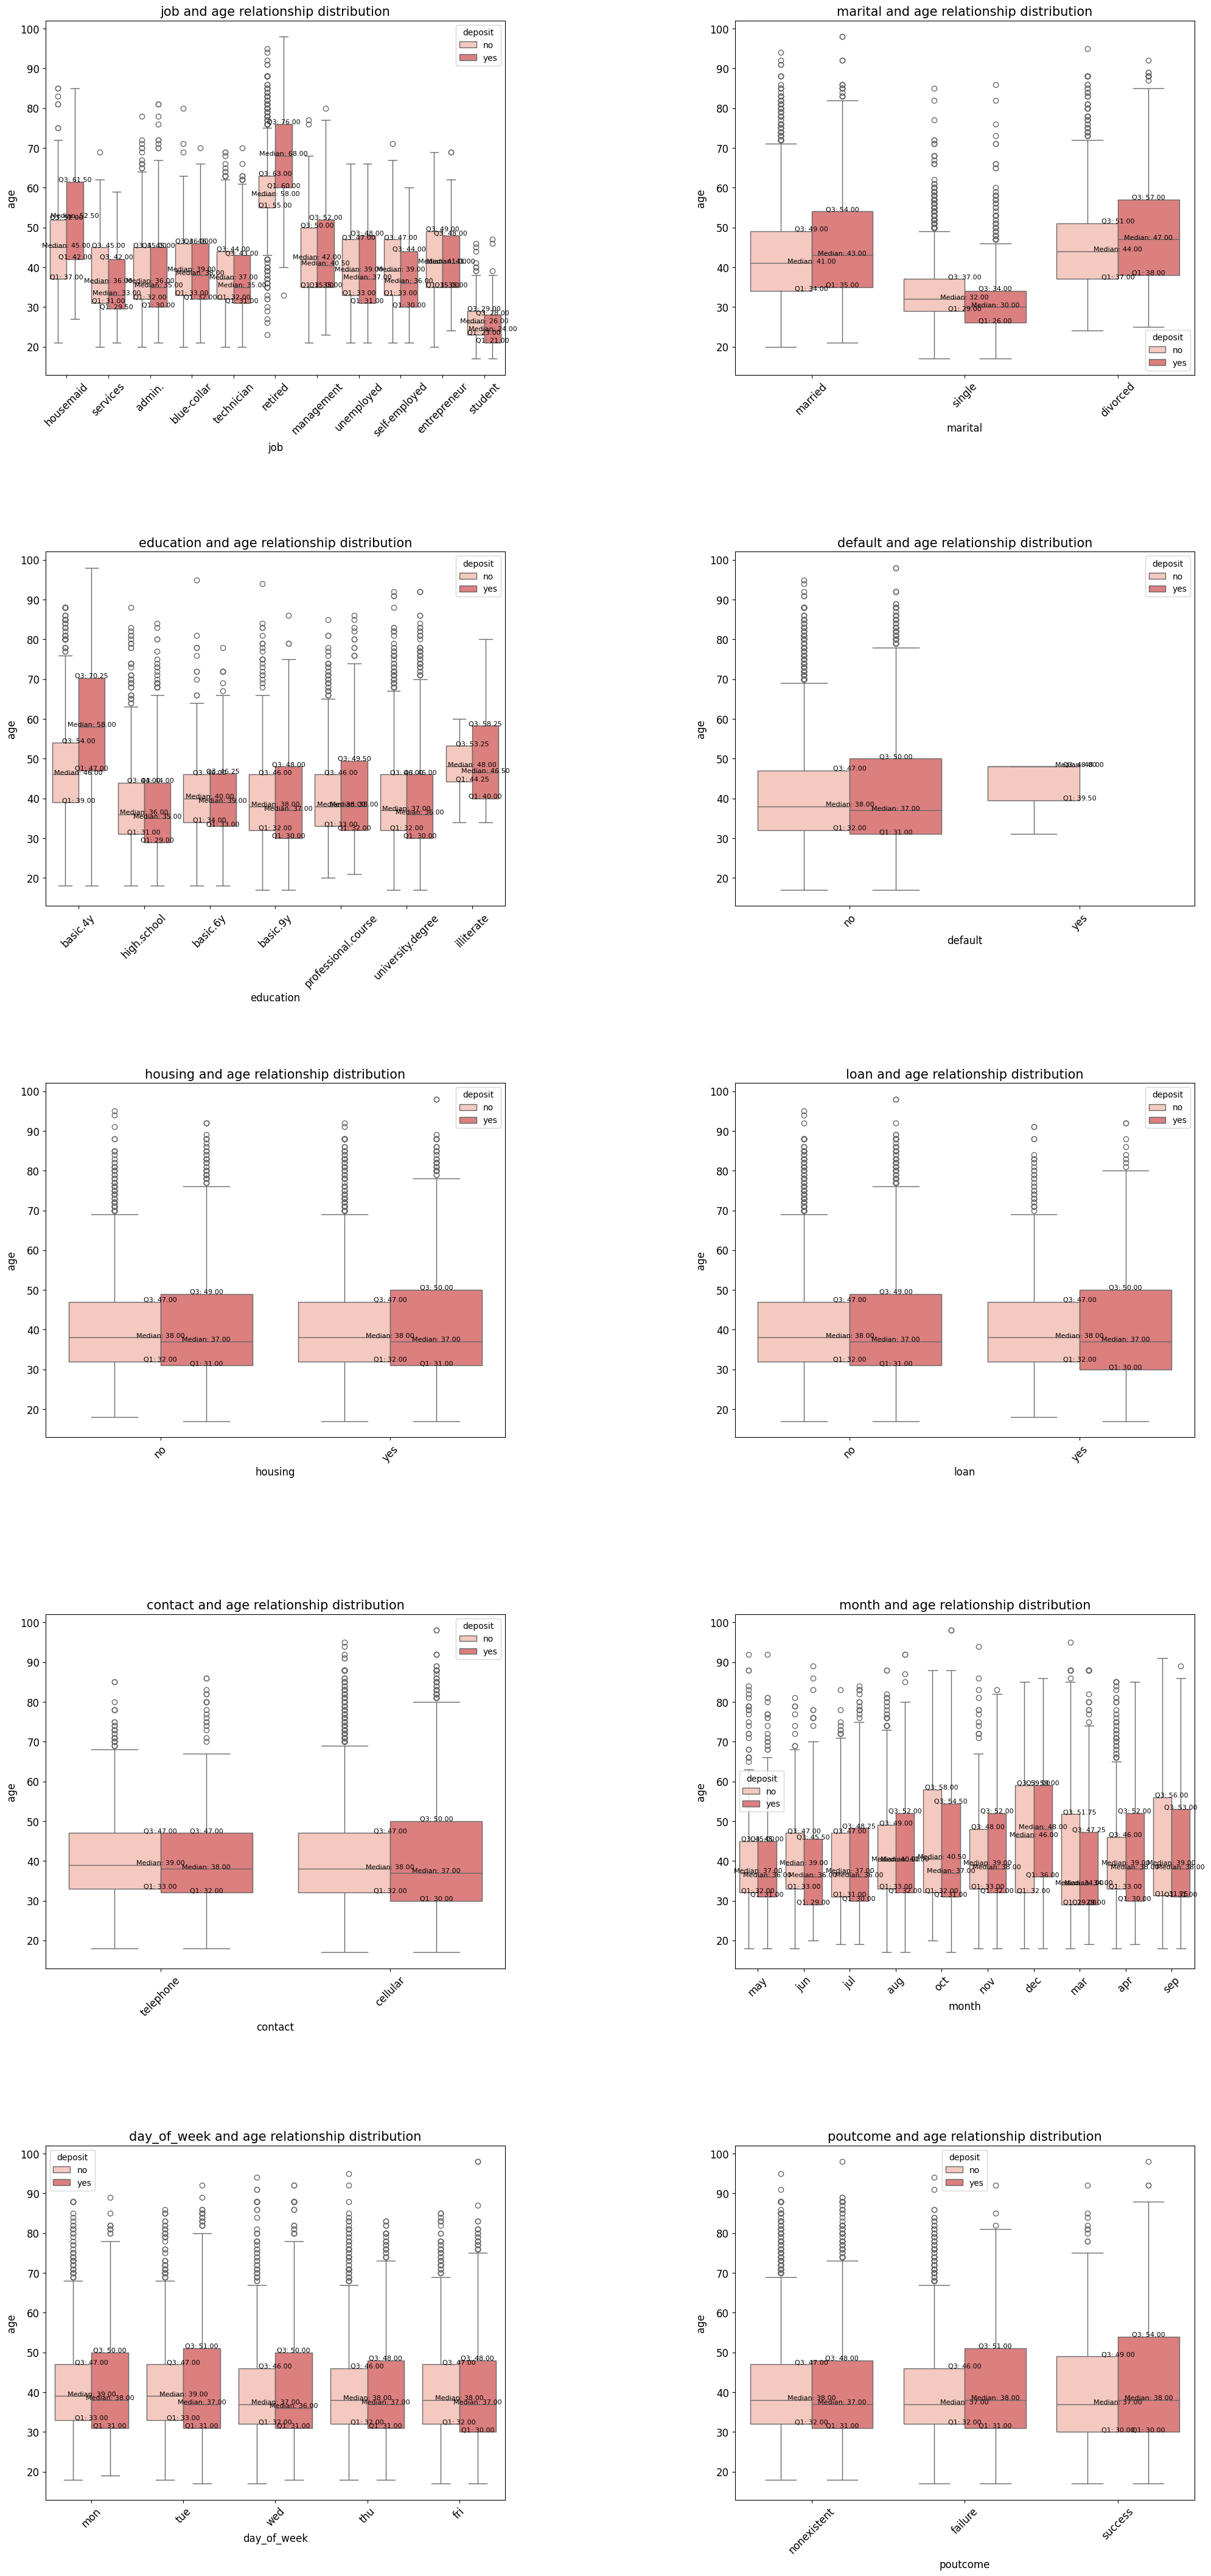

In [33]:
eda.boxplot_categorical_relationship(categ_features['Feature'],'age',hue_column='deposit')

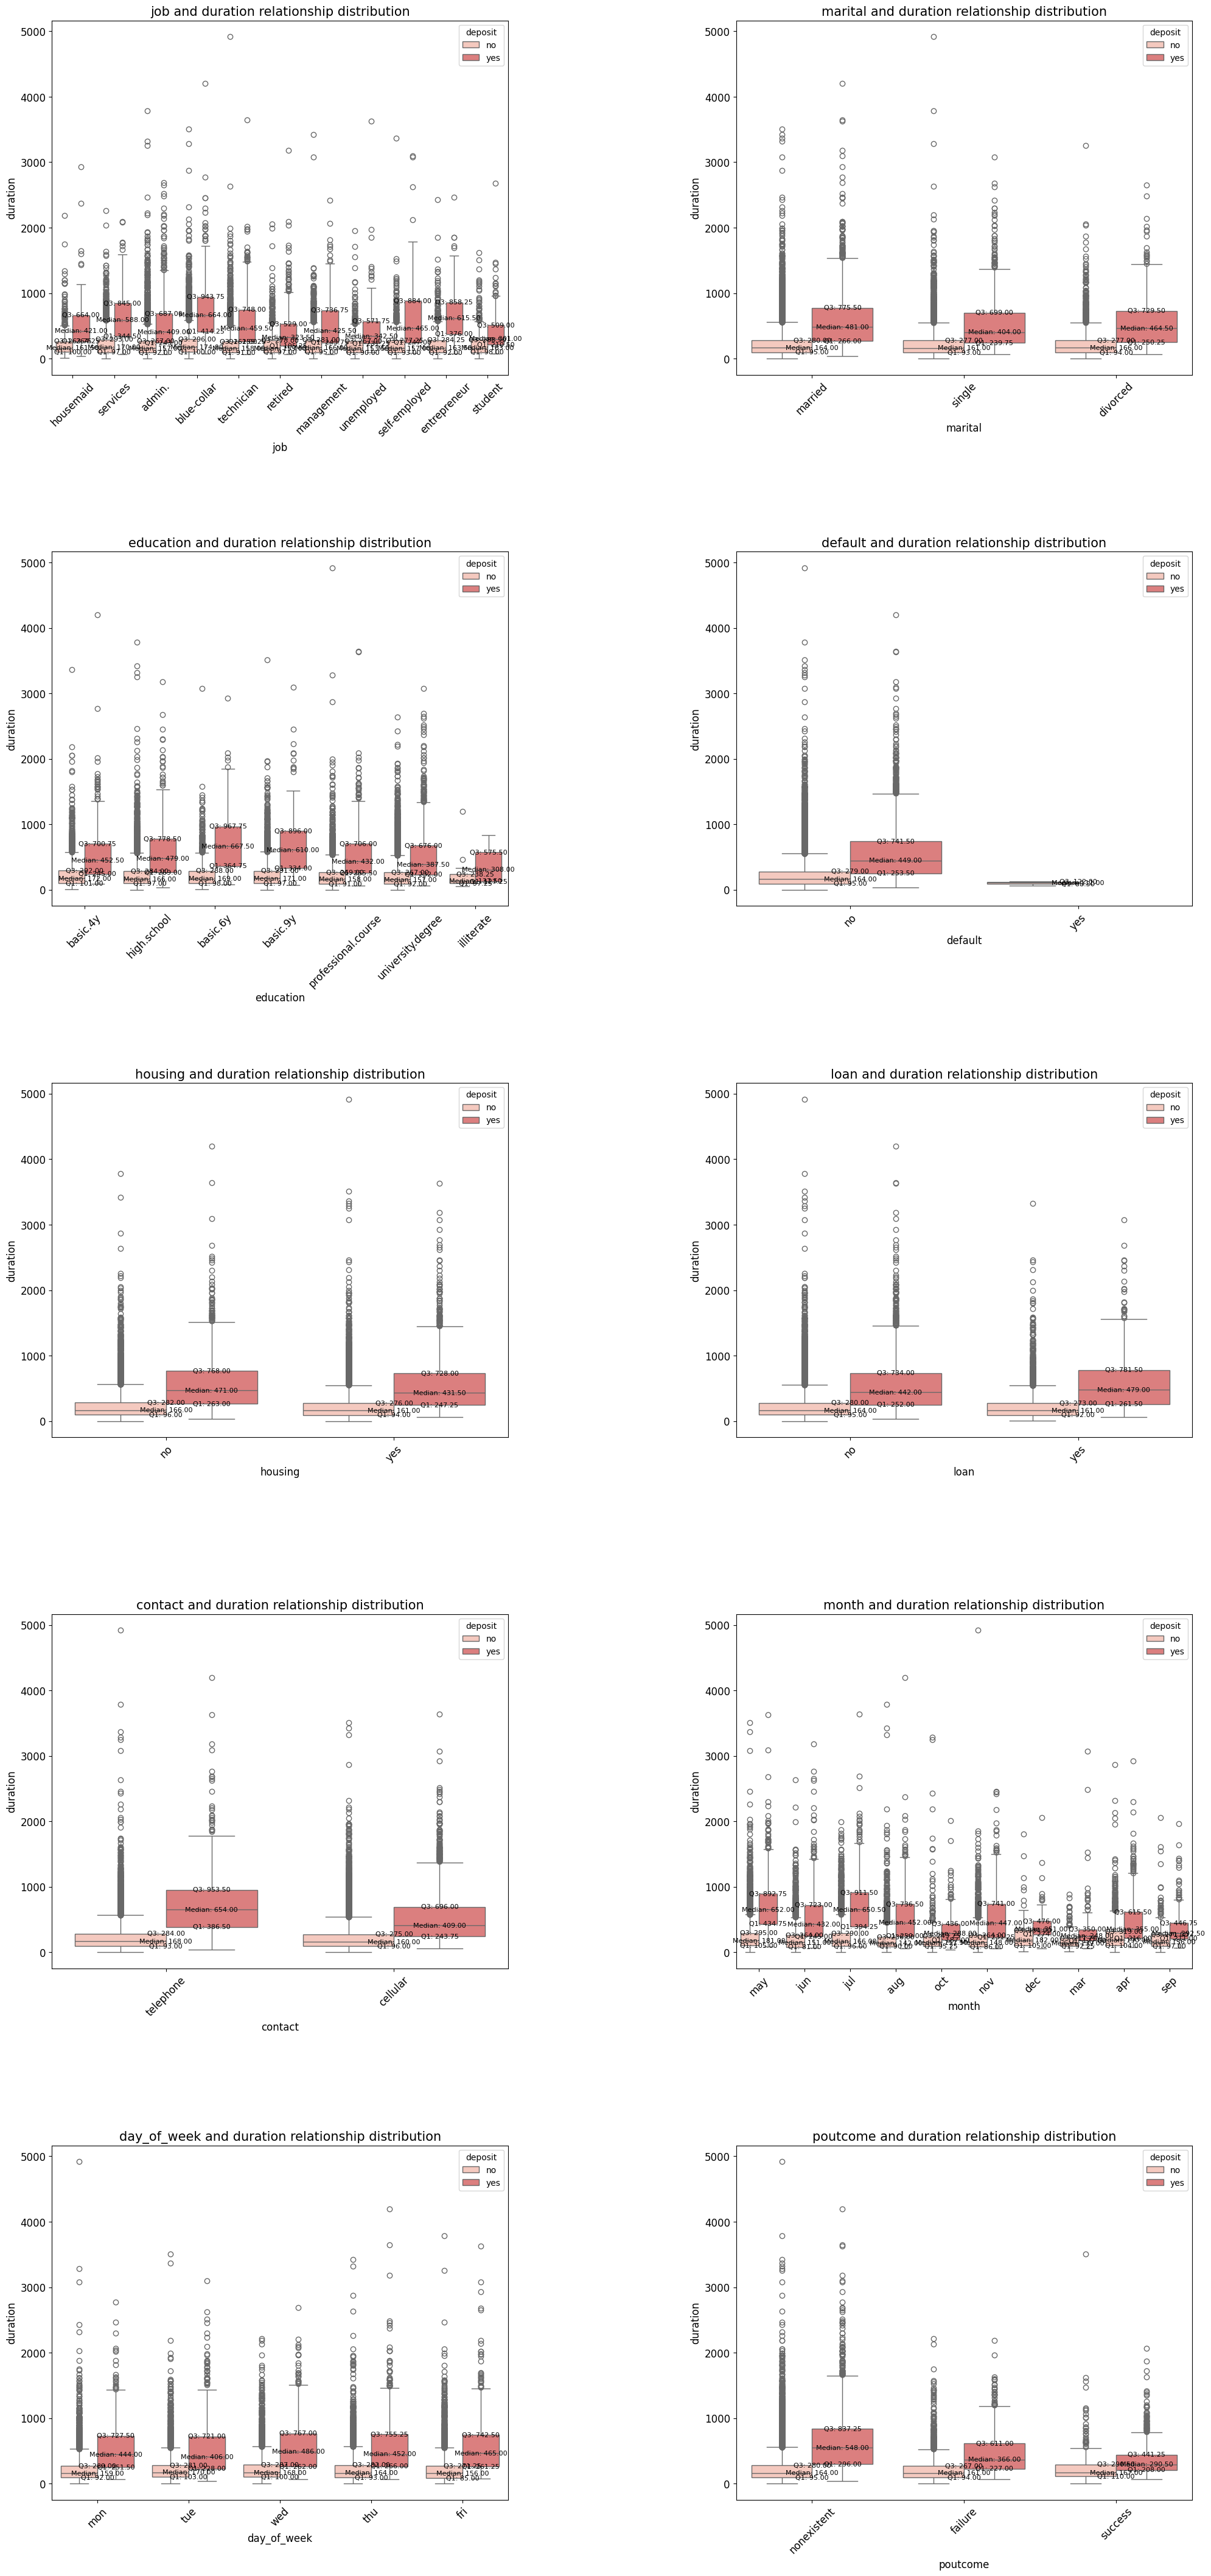

In [34]:
eda.boxplot_categorical_relationship(categ_features['Feature'],'duration',hue_column='deposit')

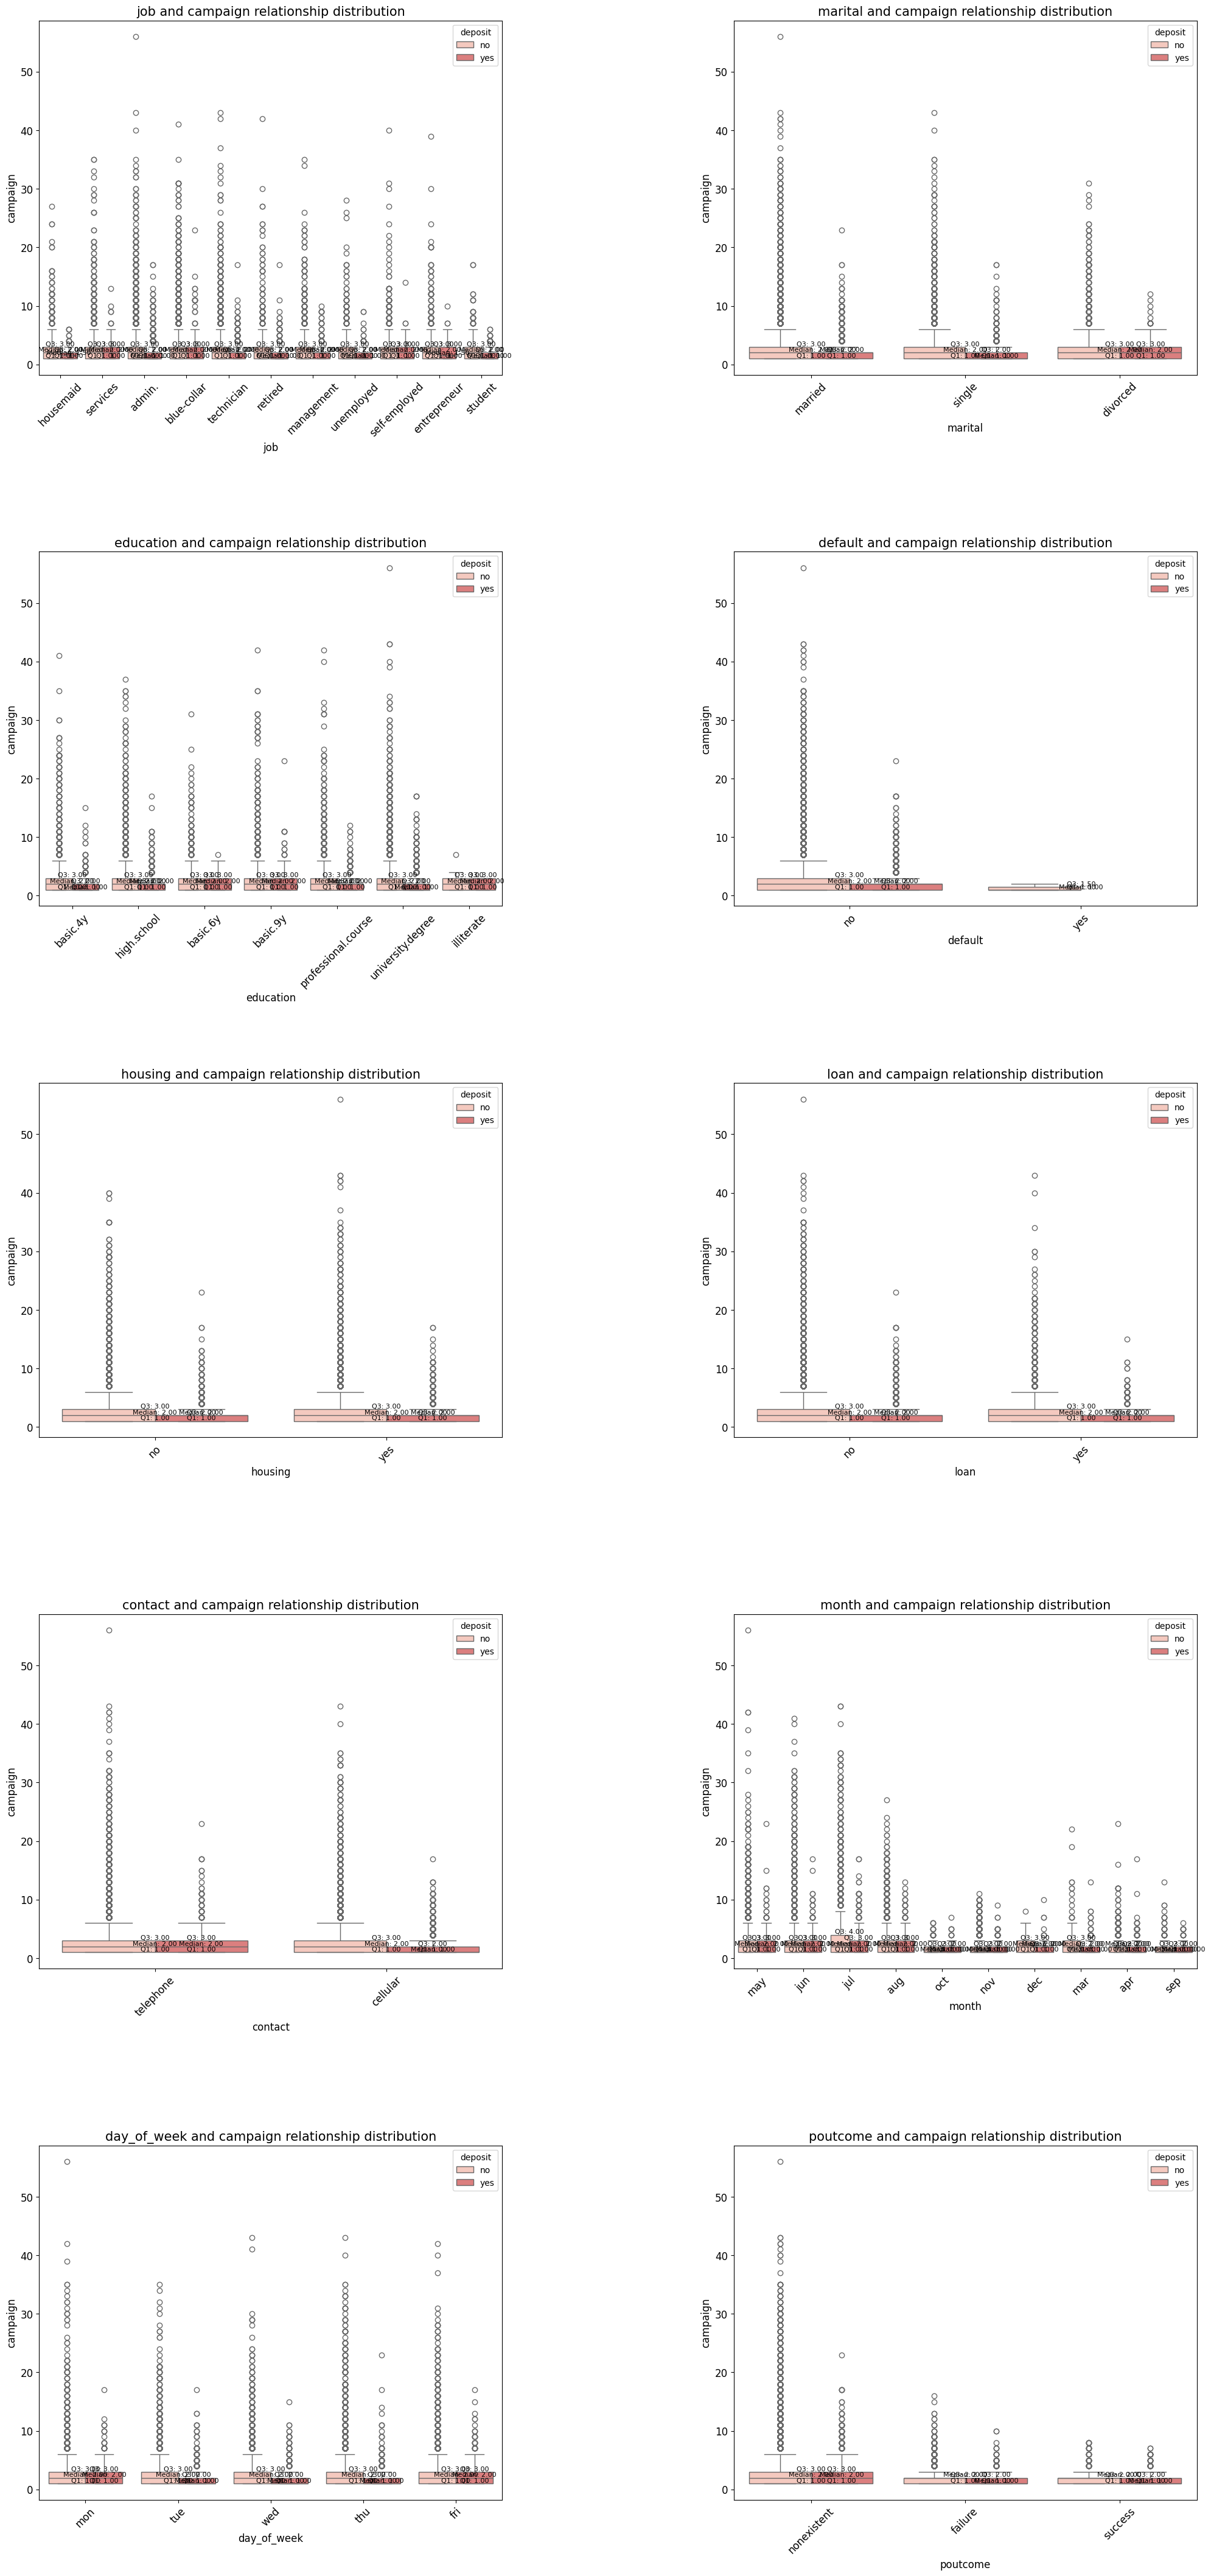

In [35]:
eda.boxplot_categorical_relationship(categ_features['Feature'],'campaign',hue_column='deposit')

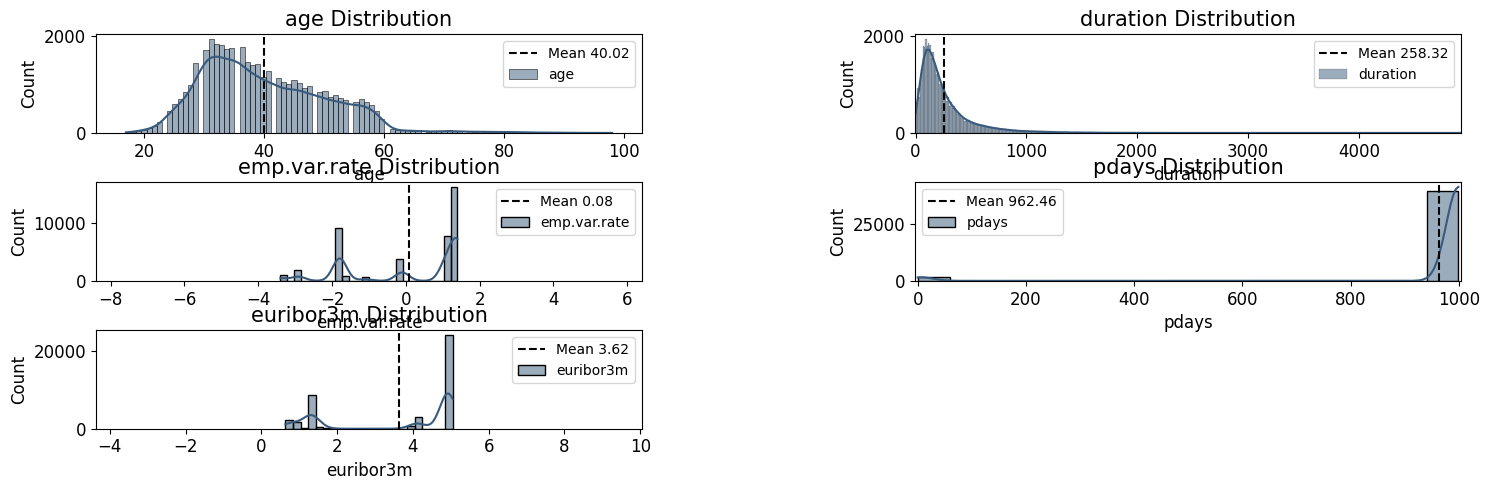

In [36]:
numeric_features=df[eda.find_numeric_features_list(target_column='deposit')].loc[:,['age','duration','emp.var.rate','pdays','euribor3m']]
eda.histplot_numeric(numeric_features.columns)

In [44]:
categ_full_features = eda.find_categorical_unique_features().reset_index(drop=True)
categ_full_features

,Feature,Unique Categories
0,job,11
1,marital,3
2,education,7
3,default,2
4,housing,2
5,loan,2
6,contact,2
7,month,10
8,day_of_week,5
9,poutcome,3


In [56]:
numeric_features=eda.find_numeric_features_list()
df[numeric_features]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [45]:
from sklearn import preprocessing

le_features= df[categ_full_features['Feature']].apply(preprocessing.LabelEncoder().fit_transform)


In [50]:
le_features.sample(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
16576,1,1,2,0,0,0,0,3,4,1,0
6495,5,1,0,0,1,1,1,6,4,1,0
11440,1,1,0,0,1,0,1,4,0,1,0
31483,9,1,5,0,0,1,0,6,4,1,0
30980,4,1,0,0,1,0,0,6,3,1,0


In [57]:
bank_df = pd.concat([df[numeric_features],le_features], axis=1) 
bank_df.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,1,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,1,1,6,1,1,0


In [48]:
categ_full_features[categ_full_features['Unique Categories']>2].loc[:,'Feature']

0            job
1        marital
2      education
7          month
8    day_of_week
9       poutcome
Name: Feature, dtype: object

In [49]:
non_binary_le = df[categ_full_features[categ_full_features['Unique Categories']>2].loc[:,'Feature']].apply(preprocessing.LabelEncoder().fit_transform)
binary_le = df[categ_full_features[categ_full_features['Unique Categories']==2].loc[:,'Feature']].apply(preprocessing.LabelEncoder().fit_transform)

In [52]:
binary_le.sample(5)

,default,housing,loan,contact,deposit
2330,0,1,0,1,1
26235,0,0,0,0,0
16171,0,0,0,0,0
39078,0,0,1,0,1
11816,0,0,0,1,0


In [51]:
non_binary_le.sample(5)

,job,marital,education,month,day_of_week,poutcome
22001,0,0,6,1,4,1
34453,0,2,6,6,2,1
33109,1,1,2,6,3,0
27712,0,1,6,5,1,1
40482,0,1,6,1,2,1


In [ ]:
eda.find_corr_heatmap(bank_df)

AttributeError: Figure.set() got an unexpected keyword argument 'figuresize'

### Model

In [ ]:
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa